<a href="https://colab.research.google.com/github/gacemiamine77/gacemiamine77/blob/main/Whisket_Plot_Moustache.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

['2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12']


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


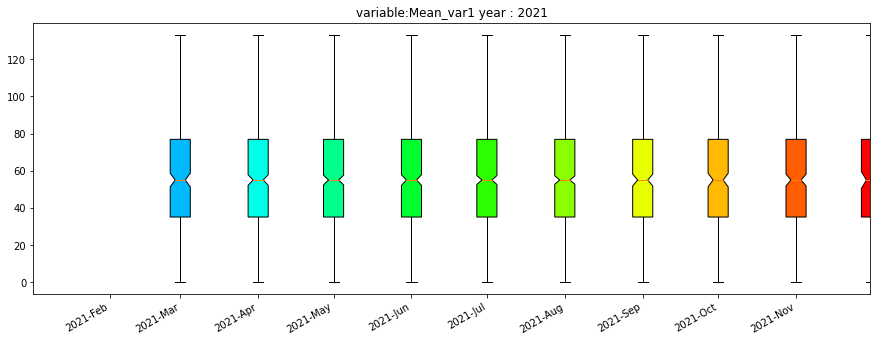

In [38]:
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import matplotlib
import matplotlib.pyplot as plt
from colour import Color

#dfxl = pd.read_excel('c:/upwork/mafe4/ForGraphs.xlsx')
dfxl = pd.read_excel('/content/drive/MyDrive/ForGraphs.xlsx')
start_month=1
end_month=12
year=2021

mean_variable='Mean_var1'
dfs=pd.DataFrame(dfxl, columns=[ 'Date',mean_variable])

List_date=[]
for y in range(year,year+1):
    for m in range(start_month,end_month+1):
        p=(f'{y}-{m:02d}')
        List_date.append(p)
print(List_date)
dates = pd.to_datetime(List_date)
#po=mpl.dates.date2num(List_date)
dat = matplotlib.dates.date2num(dates)
dtot1=[]

#dates = pd.to_datetime(List_date)
#dfs.Date = pd.to_datetime(dfs.Date)

for month in range(start_month,end_month+1):
    df_meanvar=dfs[((dfs.Date.dt.month == month) & (dfs.Date.dt.year == year))][mean_variable]
    dtot1.append(df_meanvar.to_numpy())
   
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
P=ax1.boxplot(dtot1,notch=True,positions=dat, patch_artist=True, widths=8, )

# uncommethis line if you want to customize color "
# colors = ['#0000FF', '#00FF00', '#FFFF00', '#FF00FF'] 
  
#  this line if you want to use gradient color (from the blue to red "
red = Color("blue")
colors = list(red.range_to(Color("red"),end_month-start_month+1))


for patch, color in zip(P['boxes'], colors): 
    patch.set_facecolor(color.get_hex()) 

locator = mdates.AutoDateLocator(minticks=2, maxticks=15)
formatter = mdates.DateFormatter('%Y-%b')
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)
for label in ax1.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
ax1.set_title("variable:"+mean_variable+" year : "+str(year))
fig.savefig("/content/drive/MyDrive/"+str(year)+'_'+mean_variable+"_Boxplot.png")


In [2]:
pip install colour

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
